## Assignment 1: Named Entities

#### These are the tasks: 
1. Download the dataset:
www.kaggle.com/datasets/naseralqaydeh/named-entity-recognition-ner-corpus
2. Apply a spacy-pipeline to visualize the named entities of the first 5 sentences in the dataset
(Spacy: spacy.io)
3. What is the frequency distribution of the predicted named-entity types?
• Limit the evalualtion to the first 100 sentences
• Visualize your analysis with one adequate plot type
4. Master students: Create a token classification pipeline using huggingface
• https://huggingface.co/learn/llm-course/chapter7/2
5. How good is spacy's (and huggingface's) NER in comparison to dataset's ground truth?
• Evaluate spacy's performance with one adequate metric of your choice
• !Limit the evalualtion to the first 100 sentences and
these types: 1) geo+gpe, 2) person, 3) organization!
6. Optional: Perfom Entity Linking on the dataset: https://spacy.io/api/entitylinker
Hints:
• If necessary: Perform mapping of the entity types in Spacy / dataset
• There are helpful data objects in spacy → maybe use them
• sk-learn has plenty of ready-to-use metrics → no need to start from scratch!


### Import and Load the spacy model

In [7]:
import spacy
from spacy import displacy
nlp = spacy.load("en_core_web_sm")

### load the dataset

In [8]:
import pandas as pd

df = pd.read_csv("./archive/ner.csv")
first_five = df["Sentence"].dropna().tolist()[:5]  # Replace with actual column name
print(first_five)

['Thousands of demonstrators have marched through London to protest the war in Iraq and demand the withdrawal of British troops from that country .', 'Families of soldiers killed in the conflict joined the protesters who carried banners with such slogans as " Bush Number One Terrorist " and " Stop the Bombings . "', 'They marched from the Houses of Parliament to a rally in Hyde Park .', 'Police put the number of marchers at 10,000 while organizers claimed it was 1,00,000 .', "The protest comes on the eve of the annual conference of Britain 's ruling Labor Party in the southern English seaside resort of Brighton ."]


### Apply spaCy NER

In [9]:
docs = [nlp(sentence) for sentence in first_five]

### Visualize with spaCy's

In [10]:
from IPython.display import display, HTML

for doc in docs:
    display(HTML(displacy.render(doc, style="ent")))


<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

### Frequency Distribution of Named Entity Types

In [11]:
import spacy

# Load spaCy English model
nlp = spacy.load("en_core_web_sm")

# Load your dataset (assuming text file, 1 sentence per line)
with open("./archive/ner.csv", "r", encoding="utf-8") as f:
    sentences = [line.strip() for line in f.readlines()]

# Get the first 100 sentences
first_100 = sentences[:100]

# Process each sentence with spaCy
docs = [nlp(sentence) for sentence in first_100]


### Count the entity types

In [12]:
from collections import Counter

# Make a list of all entity labels in first 100 sentences
entity_labels = []

for doc in docs:
    for ent in doc.ents:
        entity_labels.append(ent.label_)

# Count how many times each type appears
label_counts = Counter(entity_labels)

# Optional: print counts
print(label_counts)


Counter({'ORG': 625, 'WORK_OF_ART': 187, 'CARDINAL': 95, 'GPE': 87, 'DATE': 54, 'NORP': 35, 'PERSON': 16, 'LOC': 3, 'ORDINAL': 2, 'LANGUAGE': 1, 'FAC': 1, 'QUANTITY': 1, 'MONEY': 1})


### Visualize the frequency with a bar chart

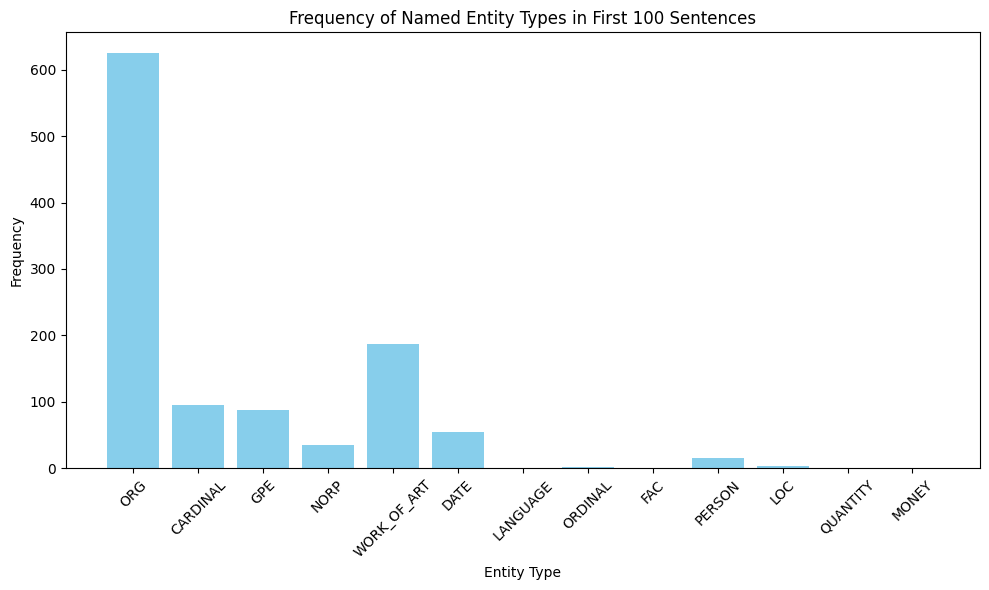

In [13]:
import matplotlib.pyplot as plt

# Convert counts to lists
labels = list(label_counts.keys())
counts = list(label_counts.values())

# Plot
plt.figure(figsize=(10, 6))
plt.bar(labels, counts, color="skyblue")
plt.xlabel("Entity Type")
plt.ylabel("Frequency")
plt.title("Frequency of Named Entity Types in First 100 Sentences")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Step 4: Create a Token Classification Pipeline Using Hugging Face

In [14]:
!pip install transformers torch


### Create a token classification pipeline using HF

In [15]:
from transformers import pipeline

### Load the NER pipeline

In [16]:
#ner_pipe = pipeline("token-classification", model="dbmdz/bert-large-cased-finetuned-conll03-english", aggregation_strategy="simple")
ner_pipe = pipeline("token-classification", model="dslim/bert-base-NER", aggregation_strategy="simple")



Some weights of the model checkpoint at dslim/bert-base-NER were not used when initializing BertForTokenClassification: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Device set to use cpu


### Apply the NER model

In [17]:
for sentence in sentences[:10]:
    print(f"\nSentence: {sentence}")
    results = ner_pipe(sentence)
    for entity in results:
        print(f" → {entity['word']} ({entity['entity_group']}) | Score: {entity['score']:.2f}")



Sentence: Sentence #,Sentence,POS,Tag

Sentence: Sentence: 1,Thousands of demonstrators have marched through London to protest the war in Iraq and demand the withdrawal of British troops from that country .,"['NNS', 'IN', 'NNS', 'VBP', 'VBN', 'IN', 'NNP', 'TO', 'VB', 'DT', 'NN', 'IN', 'NNP', 'CC', 'VB', 'DT', 'NN', 'IN', 'JJ', 'NNS', 'IN', 'DT', 'NN', '.']","['O', 'O', 'O', 'O', 'O', 'O', 'B-geo', 'O', 'O', 'O', 'O', 'O', 'B-geo', 'O', 'O', 'O', 'O', 'O', 'B-gpe', 'O', 'O', 'O', 'O', 'O']"
 → London (LOC) | Score: 1.00
 → Iraq (LOC) | Score: 1.00
 → British (MISC) | Score: 1.00

Sentence: Sentence: 2,"Families of soldiers killed in the conflict joined the protesters who carried banners with such slogans as "" Bush Number One Terrorist "" and "" Stop the Bombings . ""","['NNS', 'IN', 'NNS', 'VBN', 'IN', 'DT', 'NN', 'VBD', 'DT', 'NNS', 'WP', 'VBD', 'NNS', 'IN', 'JJ', 'NNS', 'IN', '``', 'NNP', 'NN', 'CD', 'NN', '``', 'CC', '``', 'VB', 'DT', 'NNS', '.', '``']","['O', 'O', 'O', 'O', 'O', '

## Compare spaCy and Hugging Face NER to the Ground Truth

#### Load and prepare the data

In [18]:
from sklearn.metrics import classification_report
import ast

# Load the data and 
df = pd.read_csv("./archive/ner.csv")
df['Tag'] = df['Tag'].apply(ast.literal_eval)  # Convert string to list

# Load spaCy model
nlp = spacy.load("en_core_web_sm")

### Define a Label Simplifier

In [19]:
def simplify_dataset_tag(tag):
    if tag.endswith("geo") or tag.endswith("gpe"):
        return "GPE"
    elif tag.endswith("org"):
        return "ORG"
    elif tag.endswith("per"):
        return "PERSON"
    elif tag.endswith("nat"):
        return "NORP"
    else:
        return "O"

def simplify_spacy_label(ent_label):
    # already uses standard labels like GPE, ORG, PERSON
    return ent_label


### Extract True and Predicted Labels(Token-Level Allignment)

In [20]:
true_labels = []
pred_labels = []

for index, row in df.iterrows():
    sentence = row['Sentence']
    tags = row['Tag']
    
    doc = nlp(sentence)
    doc_tokens = [token.text for token in doc]
    
    # Flatten all entity spans into a token-level label sequence
    pred_ents = ['O'] * len(doc)
    for ent in doc.ents:
        for i in range(ent.start, ent.end):
            pred_ents[i] = simplify_spacy_label(ent.label_)
    
    # Simplify true tags and align to spaCy tokens
    simplified_true_tags = [simplify_dataset_tag(t) for t in tags]
    
    # Check length match – skip sentence if lengths differ
    if len(simplified_true_tags) != len(pred_ents):
        continue  # or log a warning
    
    true_labels.extend(simplified_true_tags)
    pred_labels.extend(pred_ents)


### Evaluate Using Scikit-learn

In [21]:
from sklearn.metrics import classification_report

print(classification_report(true_labels, pred_labels, labels=["GPE", "ORG", "PERSON"], zero_division=0))


              precision    recall  f1-score   support

         GPE       0.81      0.58      0.67     48985
         ORG       0.65      0.63      0.64     28296
      PERSON       0.78      0.65      0.71     26160

   micro avg       0.75      0.61      0.67    103441
   macro avg       0.75      0.62      0.67    103441
weighted avg       0.76      0.61      0.67    103441

